<a href="https://colab.research.google.com/github/amelrnt/chocolatefruitripeness_cnn/blob/main/proyek3_chocolatefruitripeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PS: Create your kaggle credentials then upload to your runtime before running the script since the data source is public kaggle datasets**


In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download juanfelipeheredia/cocoa-ripeness-dataset-tcs-01

 93% 41.0M/44.1M [00:01<00:00, 18.2MB/s]
100% 44.1M/44.1M [00:01<00:00, 28.6MB/s]


In [7]:
!unzip cocoa-ripeness-dataset-tcs-01.zip

Archive:  cocoa-ripeness-dataset-tcs-01.zip
  inflating: Cocoa Ripeness Dataset/I1.jpg  
  inflating: Cocoa Ripeness Dataset/I10.jpg  
  inflating: Cocoa Ripeness Dataset/I100.jpg  
  inflating: Cocoa Ripeness Dataset/I101.jpg  
  inflating: Cocoa Ripeness Dataset/I102.jpg  
  inflating: Cocoa Ripeness Dataset/I103.jpg  
  inflating: Cocoa Ripeness Dataset/I104.jpg  
  inflating: Cocoa Ripeness Dataset/I105.jpg  
  inflating: Cocoa Ripeness Dataset/I106.jpg  
  inflating: Cocoa Ripeness Dataset/I107.jpg  
  inflating: Cocoa Ripeness Dataset/I108.jpg  
  inflating: Cocoa Ripeness Dataset/I109.jpg  
  inflating: Cocoa Ripeness Dataset/I11.jpg  
  inflating: Cocoa Ripeness Dataset/I110.jpg  
  inflating: Cocoa Ripeness Dataset/I111.jpg  
  inflating: Cocoa Ripeness Dataset/I112.jpg  
  inflating: Cocoa Ripeness Dataset/I113.jpg  
  inflating: Cocoa Ripeness Dataset/I114.jpg  
  inflating: Cocoa Ripeness Dataset/I115.jpg  
  inflating: Cocoa Ripeness Dataset/I116.jpg  
  inflating: Cocoa R

In [8]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
PATH = 'Cocoa Ripeness Dataset'
immature_dir = os.path.join(PATH, 'immature')
os.makedirs(immature_dir)

In [11]:
import fnmatch
import shutil

for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'I*'):
        shutil.move(PATH+'/'+file, immature_dir+'/'+file)

In [12]:
mature_dir = os.path.join(PATH, 'mature')
os.makedirs(mature_dir)

In [13]:
for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'M*'):
        shutil.move(PATH+'/'+file, mature_dir+'/'+file)

In [14]:
overmature_dir = os.path.join(PATH, 'overmature')
os.makedirs(overmature_dir)

In [15]:
for file in os.listdir(PATH):
    if fnmatch.fnmatch(file, 'S*'):
        shutil.move(PATH+'/'+file, overmature_dir+'/'+file)

**PS : split to 80 train 20 validation later**


In [ ]:
pip install split-folders

In [22]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(PATH, output="output", ratio=(.8, .2), group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 476 files [00:00, 3300.06 files/s]


In [23]:
PATH = 'output'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 20

In [24]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)

train_data_gen = train_image_generator.flow_from_directory(train_dir, 
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size = batch_size,
                                                           class_mode = 'categorical')

val_data_gen = val_image_generator.flow_from_directory(val_dir,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size = batch_size,
                                                         class_mode = 'categorical')

Found 379 images belonging to 3 classes.
Found 97 images belonging to 3 classes.


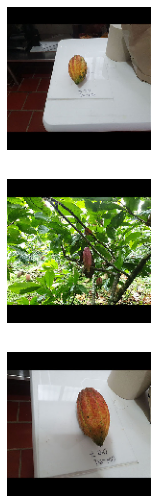

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:3])

In [37]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                        horizontal_flip=True,
                                                                        rotation_range=30,
                                                                        width_shift_range=0.1,
                                                                        height_shift_range=0.1,
                                                                        shear_range=0.1,
                                                                        zoom_range=0.6,
                                                                        fill_mode="nearest"
                                                                        )

Found 379 images belonging to 3 classes.


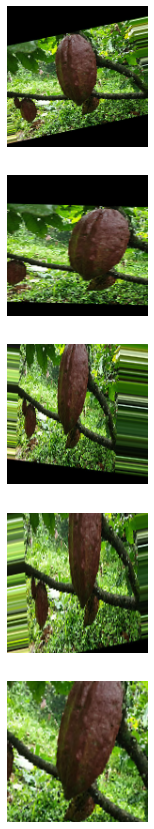

In [38]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[10][0][0] for i in range(5)]

plotImages(augmented_images)

In [39]:
model = Sequential([
    Conv2D(128, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2), padding = 'same'),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax'),
    ])

model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

In [41]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(
    train_data_gen,
    epochs=15,
    validation_data=val_data_gen,
    callbacks=early_stopping_monitor,
)

Epoch 1/15
19/19 [==============================] - 38s 2s/step - loss: 0.6003 - accuracy: 0.7942 - val_loss: 0.4884 - val_accuracy: 0.8351
Epoch 2/15
19/19 [==============================] - 38s 2s/step - loss: 0.5561 - accuracy: 0.8047 - val_loss: 0.4248 - val_accuracy: 0.8351
Epoch 3/15
19/19 [==============================] - 38s 2s/step - loss: 0.5648 - accuracy: 0.7916 - val_loss: 0.4408 - val_accuracy: 0.8351
Epoch 4/15
19/19 [==============================] - 38s 2s/step - loss: 0.5648 - accuracy: 0.8206 - val_loss: 0.5052 - val_accuracy: 0.8351
Epoch 5/15
19/19 [==============================] - 38s 2s/step - loss: 0.5315 - accuracy: 0.8232 - val_loss: 0.4174 - val_accuracy: 0.8351
Epoch 6/15
19/19 [==============================] - 38s 2s/step - loss: 0.5255 - accuracy: 0.8259 - val_loss: 0.4122 - val_accuracy: 0.8351
Epoch 7/15
19/19 [==============================] - 38s 2s/step - loss: 0.5322 - accuracy: 0.8179 - val_loss: 0.4035 - val_accuracy: 0.8247
Epoch 8/15
19/19 [==

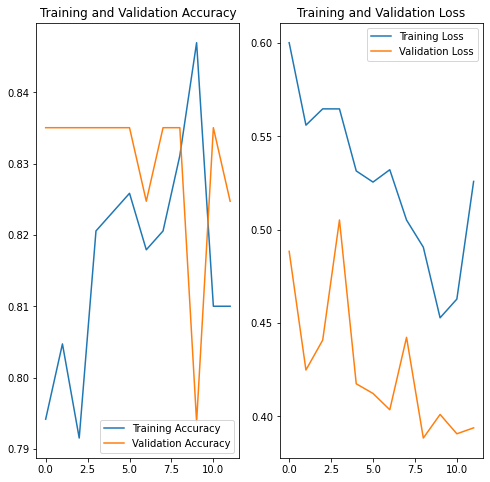

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
from google.colab import files

uploaded = files.upload()

Saving Data_Testing_Cocoa.zip to Data_Testing_Cocoa.zip


In [ ]:
!unzip Data_Testing_Cocoa.zip

In [48]:
testing_dir_immature = 'Data Testing Cocoa/immature'
test_dir_immature = 'testing_file/immature'

if not os.path.exists(test_dir_immature):
      os.makedirs(test_dir_immature)
      shutil.move(testing_dir_immature, test_dir_immature,copy_function = shutil.copytree)   

In [49]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
test_data_gen = test_image_generator.flow_from_directory(test_dir_immature,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size = batch_size,
                                                         shuffle = False)

Found 1 images belonging to 1 classes.


In [50]:
probabilities = model.predict(test_data_gen)

print(probabilities)

[[0.9590215 0.036607  0.0043715]]


In [62]:
testing_dir_mature = 'Data Testing Cocoa/mature'
test_dir_mature = 'testing_file/mature'

if not os.path.exists(test_dir_mature):
      os.makedirs(test_dir_mature)
      shutil.move(testing_dir_mature, test_dir_mature,copy_function = shutil.copytree)   

In [63]:
test_data_gen_1 = test_image_generator.flow_from_directory(test_dir_mature,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size = batch_size,
                                                         shuffle = False)

Found 1 images belonging to 1 classes.


In [64]:
probabilities1 = model.predict(test_data_gen_1)

print(probabilities1)

[[0.88320774 0.10356013 0.01323222]]


In [65]:
testing_dir_overmature = 'Data Testing Cocoa/overmature'
test_dir_overmature = 'testing_file/overmature'

if not os.path.exists(test_dir_overmature):
      os.makedirs(test_dir_overmature)
      shutil.move(testing_dir_overmature, test_dir_overmature,copy_function = shutil.copytree)   

In [66]:
test_data_gen_2 = test_image_generator.flow_from_directory(test_dir_overmature,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size = batch_size,
                                                         shuffle = False)

Found 6 images belonging to 1 classes.


In [67]:
probabilities2 = model.predict(test_data_gen_2)

print(probabilities2)

[[9.94787812e-01 5.19129355e-03 2.08678975e-05]
 [9.31263685e-01 6.86603263e-02 7.60519688e-05]
 [8.92539084e-01 1.03205726e-01 4.25524404e-03]
 [9.22615647e-01 7.38346428e-02 3.54965660e-03]
 [9.21709359e-01 7.76161700e-02 6.74453040e-04]
 [8.47183645e-01 1.50855675e-01 1.96079537e-03]]
